In [3]:
#!/bin/python
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=4
#SBATCH --partition=RT_build
#SBATCH --job-name=Agapov_proj
#SBATCH --comment="commnet for Agapov"
###SBATCH -s

import time
import pickle
import multiprocessing as mp
import sys
import os
# Necessary to add cwd to path when script run
# by SLURM (since it executes a copy)
sys.path.append(os.getcwd())
#### import plotly.express as px


# К этому моменту у нас уже проведены симмуляции с нужными параметрами и все что остается это запикалить на всякий случай траектории и построить графики

In [14]:
def read_file(q, filename):
    steps = 100
    #filename=args
    print (filename)
    data = []
    #for step in range(steps):
    f = open(filename,"r")
    for j in range(0, steps):
        data.append([])
        f.readline()
        step =int(f.readline())    
        f.readline()
        N=int(f.readline())
        f.readline()
        f.readline()
        f.readline()
        f.readline()
        f.readline()
        print(step, filename)
        for i in range(N):
            line=f.readline()
            N = int(line.split()[0])
            k = int(line.split()[1])
            l = int(line.split()[2])
            r_list = line.split()[3:]
            data[j].append({'N':N, 'mol':k, 'type':l, 'r':r_list, 'step':step })
    f.close()
    nname = "dump{:d}.pickle".format(int(filename.split('.')[0][6:]))
    with open(nname, "wb") as f:
        print('started pickling', nname)
        pickle.dump(data, f)
    #q.put([filename, data])
    #return 0

In [16]:
start_time = time.time()
filelist = [ "coords{:d}.lammpstraj".format(i) for i in [600, 700, 800, 1000, 1200] ]
#data_full = []

from multiprocessing import Process, Queue

def f(name):
    print('hello', name)
    print('module name:', __name__)
    print('parent process:', os.getppid())
    print('process id:', os.getpid())

data_full = []
if __name__ == '__main__':
    q = Queue()
    p1 = Process(target=read_file, args=(q, filelist[0]))
    p1.start()
    p2 = Process(target=read_file, args=(q, filelist[1]))
    p2.start()
    p3 = Process(target=read_file, args=(q, filelist[2]))
    p3.start()
    p4 = Process(target=read_file, args=(q, filelist[3]))
    p4.start()
    p5 = Process(target=read_file, args=(q, filelist[4]))
    p5.start()
    
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

'''

with open("dump.pickle", "rb") as f:
    data = pickle.load(f)
'''
print("--- %s seconds ---" % (time.time() - start_time))

coords600.lammpstrajcoords800.lammpstrajcoords700.lammpstraj


coords1200.lammpstraj
0coords1000.lammpstraj 
0 coords800.lammpstraj
coords1200.lammpstraj
00 coords600.lammpstraj coords1000.lammpstraj

0 coords700.lammpstraj
40004000 4000 coords800.lammpstraj coords700.lammpstrajcoords1000.lammpstraj

4000
4000  coords600.lammpstrajcoords1200.lammpstraj

8000 80008000coords800.lammpstraj
 8000  coords1200.lammpstraj
coords1000.lammpstrajcoords600.lammpstraj

8000 coords700.lammpstraj
1200012000  coords800.lammpstrajcoords1200.lammpstraj
12000
 coords600.lammpstraj
12000 coords1000.lammpstraj
12000 coords700.lammpstraj16000 
16000coords800.lammpstraj 
coords1200.lammpstraj
16000 coords600.lammpstraj
16000 16000coords1000.lammpstraj coords700.lammpstraj

2000020000  coords800.lammpstrajcoords1200.lammpstraj

20000 coords600.lammpstraj
24000 coords1200.lammpstraj
24000 coords800.lammpstraj
20000 20000coords1000.lammpstraj
 coords700.lammpstraj24000
 coords600.lammpstraj24000 coords1000.lam

In [13]:
!ls

coords_0.cfg	       dump600.pickle  gauss_en.py	 sks_rrrr600.txt
coords1000.lammpstraj  dump700.pickle  ngl.ipynb	 sks_rrrr700.txt
coords1200.lammpstraj  energy1000.txt  pic.png		 sks_rrrr800.txt
coords1500.lammpstraj  energy1200.txt  sks_rr1000.txt	 Без названия1.ipynb
coords600.lammpstraj   energy1500.txt  sks_rr600.txt	 Без названия2.ipynb
coords700.lammpstraj   energy600.txt   sks_rr700.txt	 Без названия.ipynb
coords800.lammpstraj   energy700.txt   sks_rr800.txt
data.water	       energy800.txt   sks_rrrr1000.txt


## Теперь выгружаем данные из файлов и строим графики  $ E(T)  и $ $\alpha(T) = \frac{3 \langle \Delta r^4 \rangle}{5 \langle \Delta r^2 \rangle
^2} - 1$ . В работе протность измеряется в конфетках, которые автор не переводил в кг/м^3 при выполнении и оказалось что правильная формула при числах $l$ (это сторона коробки в ангстремах) $\rho = \frac{45 \cdot 10^6}{l^3}$ т.е. для коробки 600 А мы получаем $\rho = 0.2$ кг/м^3

In [6]:
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

<ipython-input-24-409098cdeab4>:27: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(3*r4, 5*np.power(r2, 2)) - 1.0


<Figure size 6400x480 with 0 Axes>

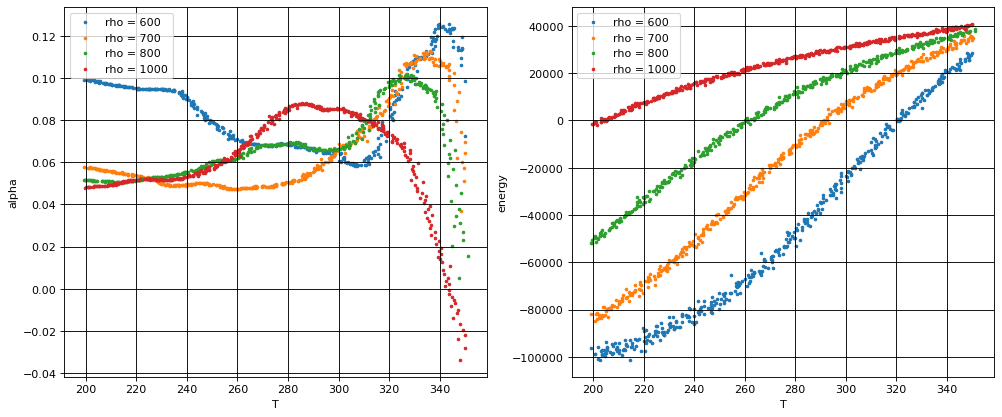

In [24]:
def get_plot(num):
    rr = []
    with open("sks_rr{:d}.txt".format(num)) as f:
            for line in f:
                if line.split()[0]=='#': continue 
                #print(float(x) for x in coloumn.split())
                rr.append(float(line))

    rrrr = []
    with open("sks_rrrr{:d}.txt".format(num)) as f:
            for line in f:
                if line.split()[0]=='#': continue 
                #print(float(x) for x in coloumn.split())
                rrrr.append(float(line))            

    t = []
    e = []
    with open("energy{:d}.txt".format(num)) as f:
            for line in f:
                if line.split()[0]=='#': continue 
                #print(float(x) for x in coloumn.split())
                t.append(float(line.split()[1]))
                e.append(float(line.split()[0]))

    r2 = np.array(rr)
    r4 = np.array(rrrr)
    a = np.divide(3*r4, 5*np.power(r2, 2)) - 1.0
    return a , e, t

a = []
e = []
t = []
for num in [600, 700, 800, 1000]:
    a0, e0 ,t0 = get_plot(num)
    a.append(a0)
    e.append(e0)
    t.append(t0)
figure(figsize=(80, 6), dpi=80)
fig, (dd, ff) = plt.subplots(1, 2, figsize=(15, 6), dpi=80)  # Create a figure containing a single axes.
num = 200
r = np.linspace(0, 100, 1001)

dd.scatter(t[0][:1001], a[0][:1001], s=5, marker='o', label='l = 600')  # Plot some data on the axes.
dd.scatter(t[1][:1001], a[1][:1001], s=5, marker='o', label='l = 700')  # Plot some data on the axes.
dd.scatter(t[2][:1001], a[2][:1001], s=5, marker='o', label='l = 800')  # Plot some data on the axes.
dd.scatter(t[3][:1001], a[3][:1001], s=5, marker='o', label='l = 1000')  # Plot some data on the axes.
#dd.scatter(t[4][:1001], a[4][:1001], s=5, marker='o')  # Plot some data on the axes.

ff.scatter(t[0][:1001], e[0][:1001], s=5, marker='o', label='l = 600')  # Plot some data on the axes.
ff.scatter(t[1][:1001], e[1][:1001], s=5, marker='o', label='l = 700')  # Plot some data on the axes.
ff.scatter(t[2][:1001], e[2][:1001], s=5, marker='o', label='l = 800')  # Plot some data on the axes.
ff.scatter(t[3][:1001], e[3][:1001], s=5, marker='o', label='l = 1000')  # Plot some data on the axes.
#dd.scatter(t[4][:1001], a[4][:1001], s=5, marker='o')  # Plot some data on the axes.

#ff.plot(t[:1001], e[:1001])
ff.set_xlabel('T')  # Add an x-label to the axes.
ff.set_ylabel('energy')
dd.set_xlabel('T')  # Add an x-label to the axes.
dd.set_ylabel('alpha')  # Add a y-label to the axes.
dd.grid(color='black', linestyle='-')
ff.grid(color='black', linestyle='-')
dd.legend()  # Add a legend.
ff.legend()  # Add a legend.
#print('ddthere')
#plt.savefig('pic.png')
plt.show()